#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [ ]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [ ]:
X= torch.arange(0, 12).reshape(4, 3)
Y= torch.arange(12, 24).reshape(4, 3)
print(X)
print(Y)
###행으로 병합 코드
Z = torch.cat((X, Y), dim = 0)
print(Z)
###열로 병합 코드
Z = torch.cat((X, Y), dim = 1)
print(Z)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]])
tensor([[ 0,  1,  2, 12, 13, 14],
        [ 3,  4,  5, 15, 16, 17],
        [ 6,  7,  8, 18, 19, 20],
        [ 9, 10, 11, 21, 22, 23]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5

In [ ]:
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.8749,  0.5073]) 
label: tensor([2.1230])


In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
        ##이하는 반복문에 대한 조건입니다.
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.0723, -1.5541],
        [-0.1752,  0.1673],
        [ 0.4214,  0.2297],
        [-1.8419, -1.9794],
        [-0.0064,  0.7500],
        [ 0.5689,  1.2007],
        [-1.9466, -0.6488],
        [-0.7324, -0.2016],
        [ 0.0658, -1.9822],
        [-1.5456, -0.7542],
        [ 2.7580,  1.7551],
        [-0.6913,  1.4117],
        [ 0.4397,  1.3271],
        [-0.4714, -0.8261],
        [ 2.4219, -0.5770],
        [-1.6281, -0.2954],
        [ 1.3628,  0.4569],
        [-1.0823, -0.3500],
        [-0.1998, -0.4141],
        [-0.2677, -0.4599]]) 
 tensor([[ 8.0403],
        [ 4.7329],
        [ 6.4200],
        [ 2.9524],
        [ 4.3595],
        [ 5.4134],
        [ 0.6127],
        [ 3.6267],
        [ 8.6843],
        [ 1.9940],
        [11.1450],
        [ 1.2875],
        [ 4.8302],
        [ 5.3062],
        [13.6366],
        [ 1.0525],
        [ 8.9127],
        [ 2.8051],
        [ 5.5196],
        [ 5.3924]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.0], requires_grad = True) #원하는 실수를 넣어주세요

In [ ]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b
    ###lr func 코드 완성하기

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2/2
    ###loss function 직접 짜보기

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      for param in params:
        param -= lr / batch_size * param.grad
        param.grad.zero_()
        ###반복문으로 채워넣기

In [ ]:
print(w[0])
print(w[1])

tensor([0.0134], grad_fn=<SelectBackward0>)
tensor([-0.0065], grad_fn=<SelectBackward0>)


In [ ]:
lr = 0.03             ###직접 설정
num_epochs = 10       ###직접 설정
net = linreg          ###위에서 가져오기
loss = squared_loss   ###위에서 가져오기

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)      ###채워넣기) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)    ###채워넣기
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.041352
epoch 2, loss 0.000161
epoch 3, loss 0.000046
epoch 4, loss 0.000045
epoch 5, loss 0.000045
epoch 6, loss 0.000045
epoch 7, loss 0.000045
epoch 8, loss 0.000045
epoch 9, loss 0.000045
epoch 10, loss 0.000045


In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0000, -0.0004], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.0002], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.0], requires_grad = True) #원하는 실수를 넣어주세요

print(w[0], w[1])

tensor([0.0050], grad_fn=<SelectBackward0>) tensor([0.0082], grad_fn=<SelectBackward0>)


In [ ]:
lr = 0.03             ###직접 설정
num_epochs = 10       ###직접 설정
net = linreg          ###위에서 가져오기
loss = squared_loss   ###위에서 가져오기

w0_list = []
w1_list = []
loss_list = []

for epoch in range(num_epochs):
      w0_list.append(w[0].clone().detach())
      w1_list.append(w[1].clone().detach())
      for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)      ###채워넣기) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)    ###채워넣기
      with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        loss_list.append(train_l.mean())

epoch 1, loss 0.041358
epoch 2, loss 0.000158
epoch 3, loss 0.000045
epoch 4, loss 0.000045
epoch 5, loss 0.000045
epoch 6, loss 0.000045
epoch 7, loss 0.000045
epoch 8, loss 0.000045
epoch 9, loss 0.000045
epoch 10, loss 0.000045


In [ ]:
for i in range(10):
  w0_list[i] = w0_list[i].numpy()[0]
  w1_list[i] = w1_list[i].numpy()[0]
  loss_list[i] = float(loss_list[i])

In [ ]:
print(loss_list)
print(w0_list)
print(w1_list)

[0.04135844483971596, 0.00015781429829075933, 4.536394772003405e-05, 4.525806798483245e-05, 4.528490171651356e-05, 4.526343764155172e-05, 4.523605457507074e-05, 4.527452983893454e-05, 4.525559052126482e-05, 4.5255710574565455e-05]
[0.0049760817, 2.8289213, 2.9903827, 2.9995365, 3.0000868, 2.99983, 3.0002031, 3.0001104, 3.0002854, 3.0000973]
[0.008154867, -1.4344285, -1.4971992, -1.4995911, -1.49949, -1.4995185, -1.4997162, -1.4996395, -1.4996068, -1.4997743]


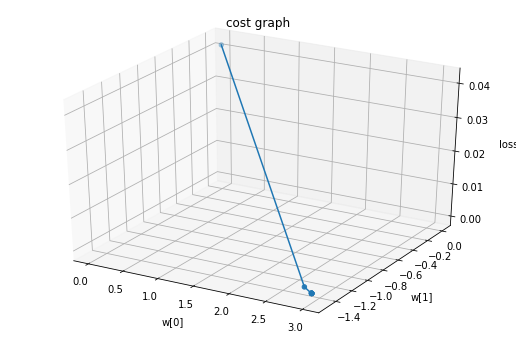

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(w0_list, w1_list, loss_list)
ax.plot(w0_list, w1_list, loss_list)

ax.set_xlabel("w[0]", size = 10, labelpad = 10)
ax.set_ylabel("w[1]", size = 10, labelpad = 10)
ax.set_zlabel("loss", size = 10, labelpad = 10)
plt.title('cost graph')
plt.show()

concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))

[tensor([[-0.9293, -1.2659],
         [ 1.2214,  0.4582],
         [ 0.2860, -1.3562],
         [-0.5070,  0.4384],
         [-0.6168, -0.8847],
         [-1.7033,  1.1969],
         [-1.0586,  1.3534],
         [-0.9779, -0.1871],
         [ 1.9399, -1.1405],
         [ 0.1449,  0.0824],
         [-0.7244, -0.4452],
         [-0.2035, -1.4215],
         [ 1.3538,  1.2143],
         [-0.8220, -0.7599],
         [ 0.0675, -0.4748],
         [ 1.4709,  0.4288],
         [-0.3466, -3.4766],
         [ 1.2887, -1.2341],
         [-1.0825, -0.3356],
         [-0.5893, -0.1361]]), tensor([[ 4.6028],
         [ 8.4890],
         [ 8.3893],
         [ 3.3240],
         [ 4.9903],
         [-1.4094],
         [ 0.2980],
         [ 2.8462],
         [13.0311],
         [ 5.8155],
         [ 4.0043],
         [ 7.0046],
         [ 7.7339],
         [ 4.1733],
         [ 6.4059],
         [ 9.2764],
         [ 9.6688],
         [11.2103],
         [ 2.7603],
         [ 3.9478]])]

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss()
###api function으로 직접 설정

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)
###api function으로 직접 설정

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)    ###직접설정
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000274
epoch 2, loss 0.000107
epoch 3, loss 0.000107


In [ ]:
w = net[0].weight.data  ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data    ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0002, -0.0002])
error in estimating b: tensor([0.0007])
